## Bifurcations on complete consensus networks


Franci, A., & Nov, O. C. (n.d.). A Realization Theory for Bio-inspired Collective Decision-Making. Retrieved from https://arxiv.org/pdf/1503.08526v3.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
import pylab

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Complete graph

In [3]:
N = 10
g = nx.complete_graph(N, create_using=nx.DiGraph())

In [4]:
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

### Saddle-node

$\dot{\mathbf{x}} = -Dx + A\cdot S_{sn}(\mathbf{x};u)$

$S_{sn}(x,u) = x + x^2 + u$

$S_{sn}^i(x,u) = -0.5 \pm \sqrt{x-u+\frac{1}{4}}$

In [5]:
x_range = np.arange(-1.5, 1, 0.01)
s_sn = lambda x,u: x + np.square(x) + u
s_sn_inv_p = lambda x,u: -0.5 + np.sqrt(np.abs(x-u+0.25))
s_sn_inv_n = lambda x,u: -0.5 - np.sqrt(np.abs(x-u+0.25))

def saddle_node_plot(u, inv):
    x_range_i = np.arange(u-0.25, 1, 0.01)
    phi_sn = lambda x,u: x - s_sn(x,u)
    plt.plot(x_range, s_sn(x_range, u), linestyle='-', color="blue", label=r'$S_{sn}$')
    if inv:
        plt.plot(x_range_i, s_sn_inv_p(x_range_i, u), linestyle='-', color="green")
        plt.plot(x_range_i, s_sn_inv_n(x_range_i, u), linestyle='-', color="green", label=r'$S_{sn}^{-1}$')
    plt.plot(x_range, x_range, linestyle='--', color='black')
    plt.xlabel(r'$x$')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

In [6]:
u_widget = widgets.FloatSlider(min=-1.0, max=0.0, step=0.1)
inv_widget = widgets.Checkbox(value=False, description="Show inverse", disabled=False)

interact(saddle_node_plot, u=u_widget, inv=inv_widget)

interactive(children=(FloatSlider(value=0.0, description='u', max=0.0, min=-1.0), Checkbox(value=False, descri…

<function __main__.saddle_node_plot(u, inv)>

In [7]:
u_range = np.linspace(start=-0.5, stop=-0.01, num=20)
x_s = np.zeros((np.size(u_range), N))

# stable
for i in np.arange(0, np.size(u_range)):
    u = u_range[i]
    f_sn = lambda t,x: -D.dot(x) + A.dot(s_sn(x,u))
    res = solve_ivp(fun=f_sn, t_span=[0,30], y0=np.random.rand(N)/10)
    x_s[i] = res.y[:,np.shape(res.y)[1]-1]

In [8]:
x_us = np.zeros((np.size(u_range), N))
# unstable
for i in np.arange(0, np.size(u_range)):
    u = u_range[i]
    f_sn = lambda t,x: -D.dot(x) + A.dot(s_sn_inv_p(x,u))
    res = solve_ivp(fun=f_sn, t_span=[0,30], y0=np.random.rand(N)/10)
    x_us[i] = res.y[:,np.shape(res.y)[1]-1]

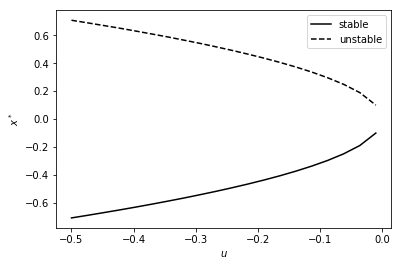

In [9]:
plt.plot(u_range, x_s[:,0], color="black", label="stable")
plt.plot(u_range, x_us[:,0], color="black", linestyle='--', label="unstable")
plt.xlabel(r'$u$')
plt.ylabel(r'$x^*$')
plt.legend()
plt.show()

### Transcritical

$\dot{\mathbf{x}} = -Dx + A\cdot S_t(\mathbf{x};u)$

$S_t(x,u) = (1+u)x + x^2$

$S_t^i(x,u) = -\frac{1}{2}(1+u) \pm \sqrt{x + \frac{1}{4}(1+u)}$

In [10]:
x_range = np.arange(-1, 1, 0.01)
s_t = lambda x,u: (1+u)*x + np.square(x)
s_t_inv_p = lambda x,u: -0.5*(1+u) + np.sqrt(x + 0.25*np.square(1+u))
s_t_inv_n = lambda x,u: -0.5*(1+u) - np.sqrt(x + 0.25*np.square(1+u))

def transcritical_plot(u, inv):
    phi_t = lambda x,u: x - s_t(x,u)
    x_range_i = np.arange(-0.25*np.square(1+u), 1, 0.01)
    plt.plot(x_range, s_t(x_range, u), linestyle='-', color="blue", label=r'$S_{t}$')
    if inv:
        plt.plot(x_range_i, s_t_inv_p(x_range_i, u), linestyle='-', color="green")
        plt.plot(x_range_i, s_t_inv_n(x_range_i, u), linestyle='-', color="green", label=r'$S_{sn}^{-1}$')
    plt.plot(x_range, x_range, linestyle='--', color='black')
    plt.xlabel(r'$x$')
    plt.legend()
    plt.ylim(-1.5,1.5)
    plt.show()

In [11]:
u_widget = widgets.FloatSlider(min=-1, max=1, step=0.1)
inv_widget = widgets.Checkbox(value=False, description="Show inverse", disabled=False)

interact(transcritical_plot, u=u_widget, inv=inv_widget)

interactive(children=(FloatSlider(value=0.0, description='u', max=1.0, min=-1.0), Checkbox(value=False, descri…

<function __main__.transcritical_plot(u, inv)>

In [12]:
dt = 0.01
u_range = np.arange(-1, 1, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_s = np.zeros((np.size(u_range), N))

# forward time to get to stable fixed points
for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_t = lambda t,x:-D.dot(x) + A.dot(s_t(x,u))
    res = solve_ivp(fun=f_t, t_span=[0,30], y0=-np.random.rand(10))
    x_s[i] = res.y[:,np.shape(res.y)[1]-1]

In [13]:
x_us = np.zeros((np.size(u_range), N))
# invert stability to get to unstable fixed points
for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_t = lambda t,x:-D.dot(x) + A.dot(s_t_inv_p(x,u))
    res = solve_ivp(fun=f_t, t_span=[0,30], y0=np.random.rand(10)/100)
    x_us[i] = res.y[:,np.shape(res.y)[1]-1]

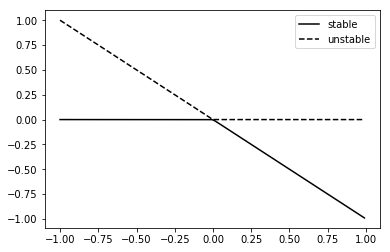

In [14]:
plt.plot(u_range, x_s[:,0], label="stable", color="black")
plt.plot(u_range, x_us[:,0], label="unstable", color="black", linestyle='--')
plt.legend()
plt.show()

### Pitchfork

#### Subcritical pitchfork

$\dot{\mathbf{x}} = -Dx + A\cdot S_{psub}(\mathbf{x};u)$

$S_{psub}(x,u) = (1+u)tan(x)$

$S_{psub}^i(x,u) = arctan(\frac{x}{1+u})$

In [15]:
u = -0.2
x_range = np.arange(-1.5, 1.5, 0.01)
s_psub = lambda x,u: (1+u)*np.tan(x)
s_psub_inv = lambda x,u: np.arctan(x/(1+u))

def pitchfork_sub_plot(u, inv):
    phi_p = lambda x,u: x - s_p(x,u)
    plt.plot(x_range, s_psub(x_range, u), color="blue", label=r'$S_t$')
    if inv:
        plt.plot(x_range, s_psub_inv(x_range, u), color="green", label=r'$S_t^i$')
    plt.plot(x_range, x_range, linestyle='--', color='black')
    plt.ylim(-2,2)
    plt.legend()
    plt.show()

In [16]:
u_widget = widgets.FloatSlider(min=-1, max=1, step=0.1)
inv_widget = widgets.Checkbox(value=False, description="Show inverse", disabled=False)

interact(pitchfork_sub_plot, u=u_widget, inv=inv_widget)

interactive(children=(FloatSlider(value=0.0, description='u', max=1.0, min=-1.0), Checkbox(value=False, descri…

<function __main__.pitchfork_sub_plot(u, inv)>

In [17]:
dt = 0.01
u_range = np.arange(-1+dt, 1, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_us_p = np.zeros((np.size(u_range), N))
x_us_n = np.zeros((np.size(u_range), N))

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=np.random.rand(N)/10)
    x_us_p[i] = res.y[:,-1]

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=-np.random.rand(N)/10)
    x_us_n[i] = res.y[:,-1]

In [18]:
u_range_stable = np.arange(-1+dt, -dt, dt)
x_s = np.zeros((np.size(u_range_stable), N))
for i in np.arange(0,np.size(u_range_stable)):
    u = u_range_stable[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=np.random.rand(N)/10)
    x_s[i] = res.y[:,-1]

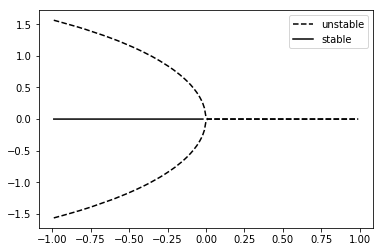

In [19]:
plt.plot(u_range, x_us_p[:,0], color="black", linestyle='--')
plt.plot(u_range, x_us_n[:,0], label="unstable", color="black", linestyle='--')
plt.plot(u_range_stable, x_s[:,0], label="stable", linestyle='-', color="black")
plt.legend()
plt.show()

#### Supercritical pitchfork

$\dot{\mathbf{x}} = -Dx + A\cdot S_{psup}(\mathbf{x};u)$

$S_{psup}(x,u) = (1+u)tanh(x)$

$S_{psup}^i(x,u) = arctanh(\frac{x}{1+u})$

In [20]:
x_range = np.arange(-2, 2, 0.01)
s_psup = lambda x,u: (u+1)*np.tanh(x)
s_psup_inv = lambda x,u: np.arctanh(x/(u+1))
phi_psup = lambda x,u: x - s_psup(x,u)

def pitchfork_super_plot(u, inv):
    plt.plot(x_range, s_psup(x_range, u), color="blue", label=r'$S_t$')
    if inv and u > 0:
        x_range_inv = np.arange(-(1+u)+dt, (1+u)-dt, 0.01)
        plt.plot(x_range_inv, s_psup_inv(x_range_inv, u), color="green", label=r'$S_t^i$')
    plt.plot(x_range, x_range, linestyle='--', color='black')
    plt.ylim(-2.5, 2.5)
    plt.legend()
    plt.show()

In [21]:
u_widget = widgets.FloatSlider(min=-1, max=1, step=0.1)
interact(pitchfork_super_plot, u=u_widget, inv=inv_widget)

interactive(children=(FloatSlider(value=0.0, description='u', max=1.0, min=-1.0), Checkbox(value=False, descri…

<function __main__.pitchfork_super_plot(u, inv)>

In [22]:
x_s_p = np.zeros((np.size(u_range), N))
x_s_n = np.zeros((np.size(u_range), N))

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psup(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=np.random.rand(N)/10)
    x_s_p[i] = res.y[:,-1]

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psup(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=-np.random.rand(N)/10)
    x_s_n[i] = res.y[:,-1]

In [23]:
u_range_unstable = np.arange(dt, 1-dt, dt)
x_us = np.zeros((np.size(u_range_unstable), N))
for i in np.arange(0,np.size(u_range_unstable)):
    u = u_range_unstable[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psup_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=np.random.rand(N)/10)
    x_us[i] = res.y[:,-1]

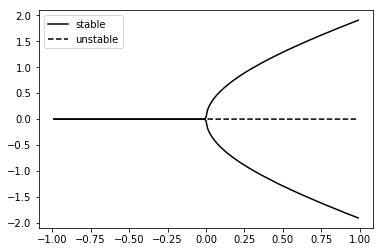

In [24]:
plt.plot(u_range, x_s_p[:,0], color="black", linestyle='-')
plt.plot(u_range, x_s_n[:,0], label="stable", color="black", linestyle='-')
plt.plot(u_range_unstable, x_us[:,0], label="unstable", linestyle='--', color="black")
plt.legend()
plt.show()